<a href="https://colab.research.google.com/github/htwthilini/computer-vision-Assignment/blob/main/assignment_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

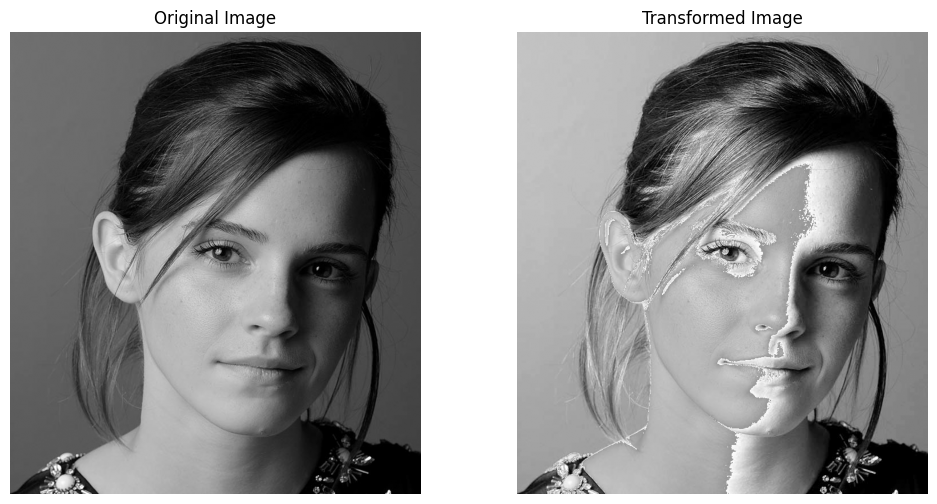

In [1]:
!pip install opencv-python matplotlib numpy
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale)
img = cv2.imread("emma.jpg", cv2.IMREAD_GRAYSCALE)

def intensity_transform(r):
    if r < 50:
        return (100/50) * r   # slope = 100/50
    elif r < 150:
        return 100 + (155/100) * (r - 50)   # slope = 155/100
    else:
        return 150 + (105/105) * (r - 150)  # slope = 105/105 = 1

transform_vec = np.vectorize(intensity_transform)

transformed_img = transform_vec(img).astype(np.uint8)

# Show results
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Transformed Image")
plt.imshow(transformed_img, cmap="gray")
plt.axis("off")

plt.show()

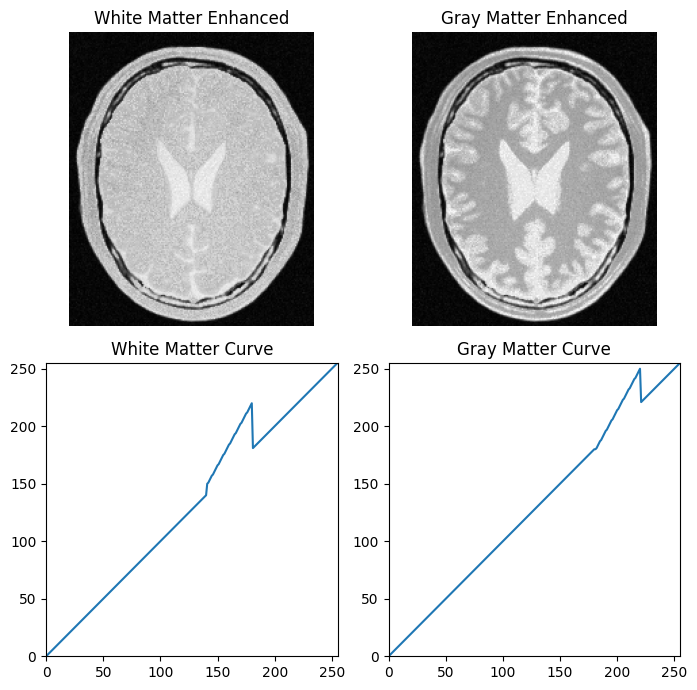

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale brain image
img_orig = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

t_white = np.arange(256, dtype='uint8')
t_white[141:181] = np.linspace(150, 220, 40).astype('uint8')

t_gray = np.arange(256, dtype='uint8')
t_gray[181:221] = np.linspace(180, 250, 40).astype('uint8')

white_matter = cv.LUT(img_orig, t_white)
gray_matter  = cv.LUT(img_orig, t_gray)

fig, ax = plt.subplots(2, 2, figsize=(7, 7))

ax[0,0].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title("White Matter Enhanced")
ax[0,0].axis("off")

ax[1,0].plot(t_white)
ax[1,0].set_title("White Matter Curve")
ax[1,0].set_ylim([0, 255])
ax[1,0].set_xlim([0, 255])

ax[0,1].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[0,1].set_title("Gray Matter Enhanced")
ax[0,1].axis("off")

ax[1,1].plot(t_gray)
ax[1,1].set_title("Gray Matter Curve")
ax[1,1].set_ylim([0, 255])
ax[1,1].set_xlim([0, 255])

plt.tight_layout()
plt.show()


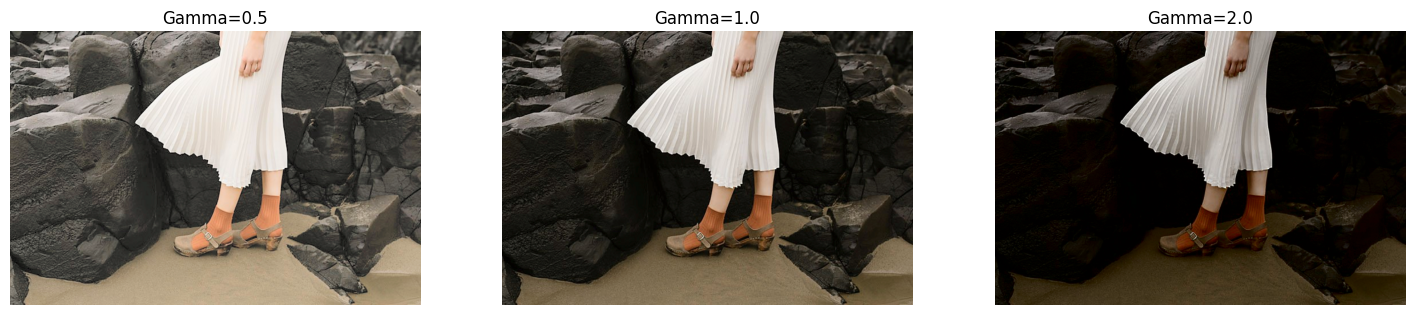

/tmp/ipython-input-843893653.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(L_corr.ravel(), 256, [0,256])


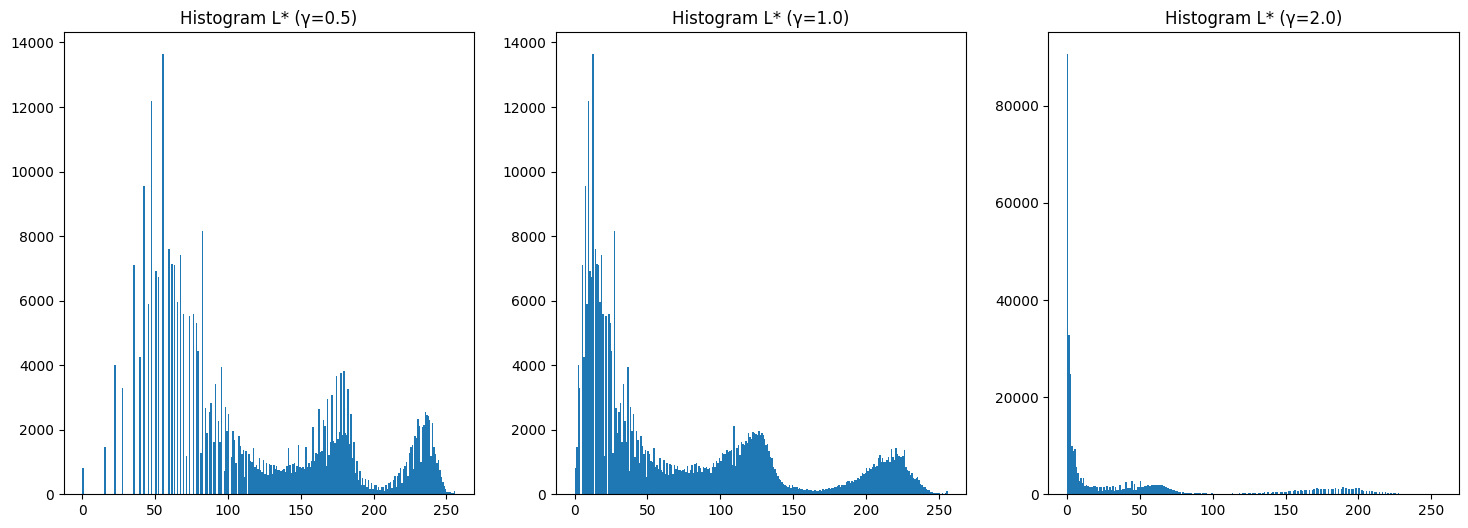

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("highlights_and_shadows.jpg")   # change to your file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
L, a, b = cv2.split(lab)

gamma_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(18,6))
for i, gamma in enumerate(gamma_values):
    #### Apply gamma correction on L channel
    L_corr = np.power(L/255.0, gamma) * 255
    L_corr = L_corr.astype("uint8")

    #### Merge back and convert to RGB
    lab_corr = cv2.merge([L_corr, a, b])
    img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_Lab2RGB)

    #### Show corrected images
    plt.subplot(1, len(gamma_values), i+1)
    plt.imshow(img_corr)
    plt.title(f"Gamma={gamma}")
    plt.axis("off")
plt.show()

plt.figure(figsize=(18,6))
for i, gamma in enumerate(gamma_values):
    L_corr = np.power(L/255.0, gamma) * 255
    L_corr = L_corr.astype("uint8")

    plt.subplot(1, len(gamma_values), i+1)
    plt.hist(L_corr.ravel(), 256, [0,256])
    plt.title(f"Histogram L* (γ={gamma})")
plt.show()


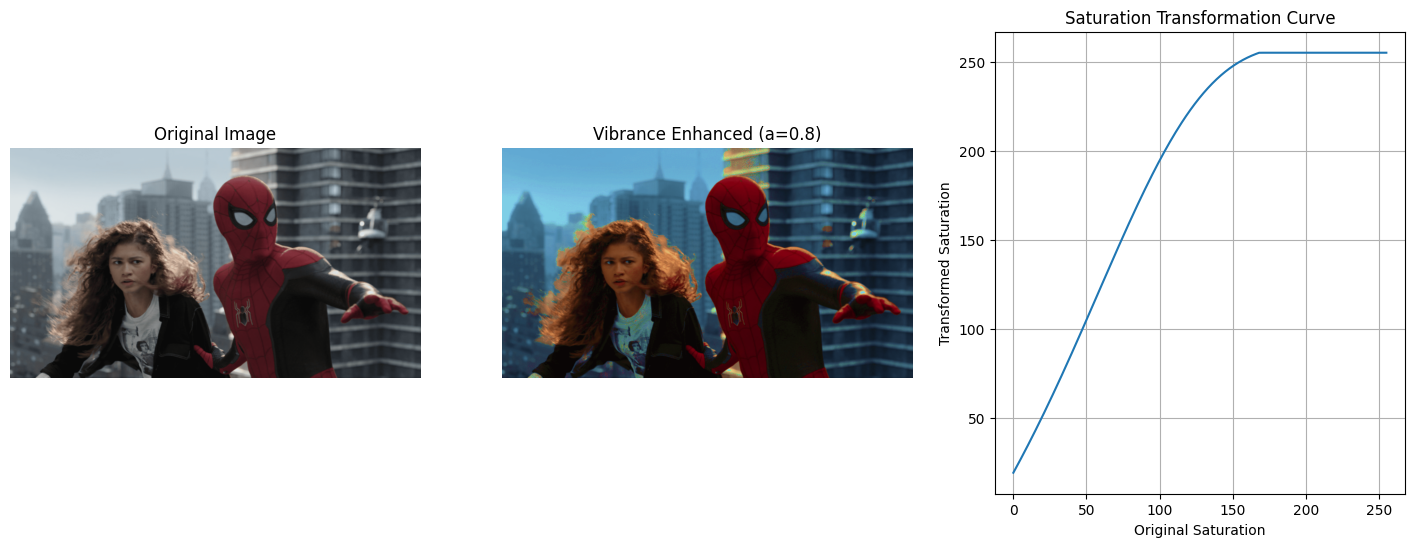

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("spider.png")  # Change filename
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

a = 0.8
sigma = 70

S_trans = S + a * 128 * np.exp(-((S - 128) ** 2) / (2 * sigma ** 2))
S_trans = np.clip(S_trans, 0, 255).astype(np.uint8)

hsv_corr = cv2.merge([H, S_trans, V])
img_vibrance = cv2.cvtColor(hsv_corr, cv2.COLOR_HSV2RGB)

# Display results
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_vibrance)
plt.title(f"Vibrance Enhanced (a={a})")
plt.axis("off")

# Plot intensity transformation curve
x = np.arange(0, 256)
y = x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
y = np.clip(y, 0, 255)
plt.subplot(1,3,3)
plt.plot(x, y)
plt.title("Saturation Transformation Curve")
plt.xlabel("Original Saturation")
plt.ylabel("Transformed Saturation")
plt.grid(True)

plt.show()


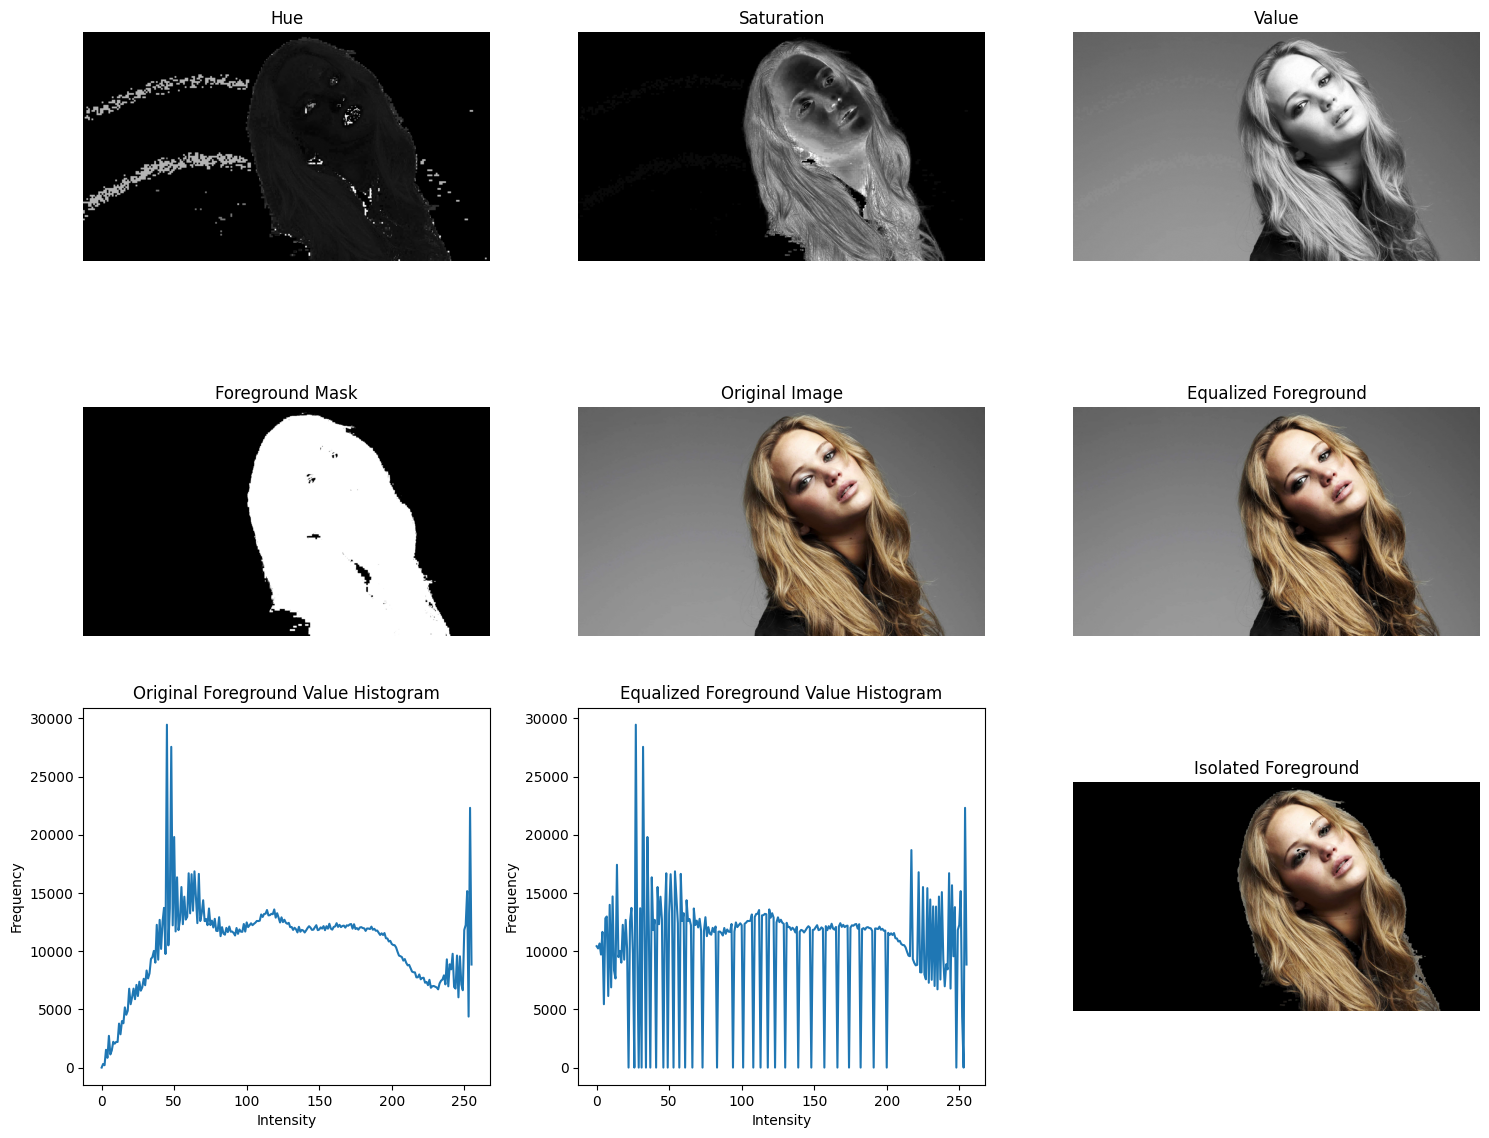

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to HSV
img_orig = cv.imread('jeniffer.jpg')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)


_, mask = cv.threshold(s, 13, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(img_orig, img_orig, mask=mask)
background = cv.bitwise_and(img_orig, img_orig, mask=cv.bitwise_not(mask))

fg_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
h_fg, s_fg, v_fg = cv.split(fg_hsv)

# Histogram and cumulative distribution for foreground
hist, _ = np.histogram(v_fg[mask > 0].ravel(), 256, [0, 256])
cdf = hist.cumsum()
MN = v_fg[mask > 0].size
L = 256
t = np.array([(L-1)/MN * cdf[i] for i in range(256)]).astype('uint8')


v_fg_eq = v_fg.copy()
v_fg_eq[mask > 0] = t[v_fg[mask > 0]]

foreground_eq = cv.merge([h_fg, s_fg, v_fg_eq])
foreground_eq = cv.cvtColor(foreground_eq, cv.COLOR_HSV2BGR)
img_modified = cv.add(foreground_eq, background)

hist_eq, _ = np.histogram(v_fg_eq[mask > 0].ravel(), 256, [0, 256])

# ---------- Visualization in one figure ----------
fig, axes = plt.subplots(3, 3, figsize=(15,12))

# Row 1: HSV planes of original image
axes[0,0].imshow(h, cmap='gray'); axes[0,0].set_title('Hue'); axes[0,0].axis('off')
axes[0,1].imshow(s, cmap='gray'); axes[0,1].set_title('Saturation'); axes[0,1].axis('off')
axes[0,2].imshow(v, cmap='gray'); axes[0,2].set_title('Value'); axes[0,2].axis('off')

# Row 2: Foreground mask, original image, modified image
axes[1,0].imshow(mask, cmap='gray'); axes[1,0].set_title('Foreground Mask'); axes[1,0].axis('off')
axes[1,1].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)); axes[1,1].set_title('Original Image'); axes[1,1].axis('off')
axes[1,2].imshow(cv.cvtColor(img_modified, cv.COLOR_BGR2RGB)); axes[1,2].set_title('Equalized Foreground'); axes[1,2].axis('off')

# Row 3: Histogram comparison of Value plane
axes[2,0].plot(hist); axes[2,0].set_title('Original Foreground Value Histogram')
axes[2,0].set_xlabel('Intensity'); axes[2,0].set_ylabel('Frequency')
axes[2,1].plot(hist_eq); axes[2,1].set_title('Equalized Foreground Value Histogram')
axes[2,1].set_xlabel('Intensity'); axes[2,1].set_ylabel('Frequency')
axes[2,2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)); axes[2,2].set_title('Isolated Foreground'); axes[2,2].axis('off')

plt.tight_layout()
plt.show()


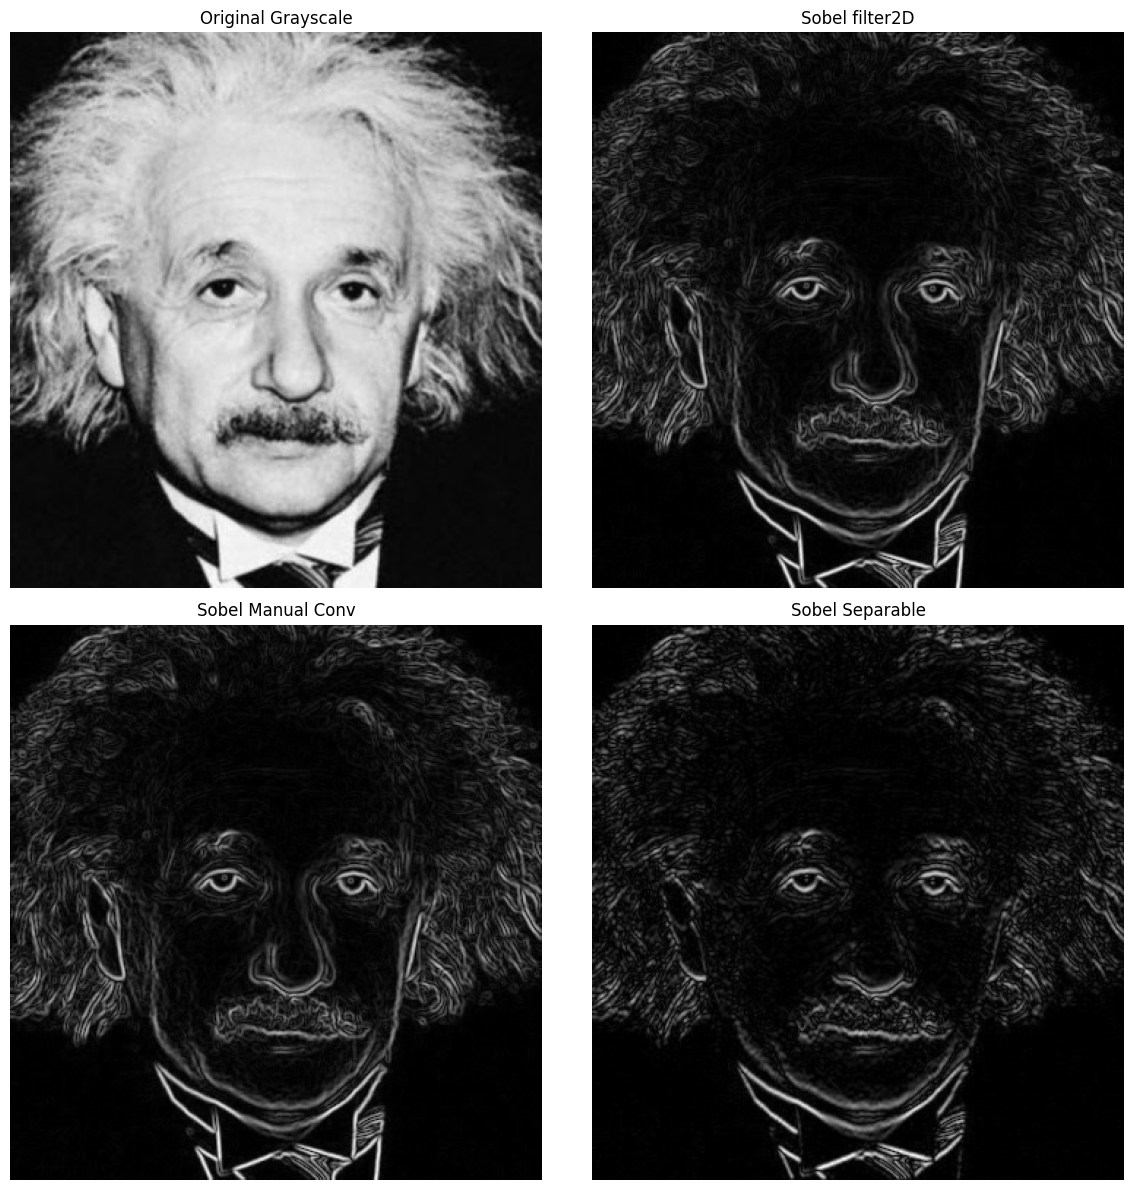

True

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# ---------- Load grayscale image ----------
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert image is not None, "Failed to load einstein.png"
gray_img = image.astype(np.float32)

# ---------- Sobel kernels ----------
kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

kernel_sobel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]], dtype=np.float32)

normalization = 1/8.0  # scale factor

# ---------- Utility ----------
def normalize_to_uint8(mat):
    return cv.normalize(mat, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# ---------- Part (a) Using OpenCV filter2D ----------
grad_x_cv = cv.filter2D(gray_img, cv.CV_32F, kernel_sobel_x) * normalization
grad_y_cv = cv.filter2D(gray_img, cv.CV_32F, kernel_sobel_y) * normalization
magnitude_cv = np.sqrt(grad_x_cv**2 + grad_y_cv**2)
magnitude_cv_uint8 = normalize_to_uint8(magnitude_cv)

# ---------- Part (b) Manual convolution ----------
def manual_conv2d(src_img, conv_kernel):
    kh, kw = conv_kernel.shape
    pad_h, pad_w = kh//2, kw//2
    conv_kernel = np.flipud(np.fliplr(conv_kernel))
    padded_img = np.pad(src_img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    H, W = src_img.shape
    result = np.zeros_like(src_img, dtype=np.float32)
    for i in range(H):
        for j in range(W):
            region = padded_img[i:i+kh, j:j+kw]
            result[i,j] = np.sum(region * conv_kernel)
    return result

grad_x_manual = manual_conv2d(gray_img, kernel_sobel_x) * normalization
grad_y_manual = manual_conv2d(gray_img, kernel_sobel_y) * normalization
magnitude_manual = np.sqrt(grad_x_manual**2 + grad_y_manual**2)
magnitude_manual_uint8 = normalize_to_uint8(magnitude_manual)

# ---------- Part (c) Separable Sobel ----------
kernel_h = np.array([1, 0, -1], dtype=np.float32)
kernel_v = np.array([1, 2, 1], dtype=np.float32)

temp_y = cv.filter2D(gray_img, cv.CV_32F, kernel_v)
grad_x_sep = cv.filter2D(temp_y, cv.CV_32F, kernel_h) * normalization

temp_x = cv.filter2D(gray_img, cv.CV_32F, kernel_h)
grad_y_sep = cv.filter2D(temp_x, cv.CV_32F, kernel_v) * normalization

magnitude_sep = np.sqrt(grad_x_sep**2 + grad_y_sep**2)
magnitude_sep_uint8 = normalize_to_uint8(magnitude_sep)

# ---------- Display all images together ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].imshow(gray_img.astype(np.uint8), cmap='gray')
axes[0,0].set_title("Original Grayscale")
axes[0,0].axis('off')

axes[0,1].imshow(magnitude_cv_uint8, cmap='gray')
axes[0,1].set_title("Sobel filter2D")
axes[0,1].axis('off')

axes[1,0].imshow(magnitude_manual_uint8, cmap='gray')
axes[1,0].set_title("Sobel Manual Conv")
axes[1,0].axis('off')

axes[1,1].imshow(magnitude_sep_uint8, cmap='gray')
axes[1,1].set_title("Sobel Separable")
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# ---------- Save output images ----------
cv.imwrite("sobel_filter2D_output.png", magnitude_cv_uint8)
cv.imwrite("sobel_manual_output.png", magnitude_manual_uint8)
cv.imwrite("sobel_separable_output.png", magnitude_sep_uint8)


In [52]:
import cv2
import numpy as np

def zoom_image(img, scale, method='nearest'):
    H, W = img.shape[:2]
    new_H, new_W = int(H * scale), int(W * scale)
    zoomed = np.zeros((new_H, new_W, img.shape[2]) if img.ndim == 3 else (new_H, new_W), dtype=img.dtype)
    if method == 'nearest':
        for i in range(new_H):
            for j in range(new_W):
                x = min(int(i / scale), H - 1)
                y = min(int(j / scale), W - 1)
                zoomed[i, j] = img[x, y]
    elif method == 'bilinear':
        for i in range(new_H):
            for j in range(new_W):
                x = i / scale
                y = j / scale

                x0 = int(np.floor(x))
                x1 = min(x0 + 1, H - 1)
                y0 = int(np.floor(y))
                y1 = min(y0 + 1, W - 1)

                a = x - x0
                b = y - y0
                if img.ndim == 2:
                    zoomed[i, j] = (1 - a) * (1 - b) * img[x0, y0] + a * (1 - b) * img[x1, y0] + \
                                   (1 - a) * b * img[x0, y1] + \
                                   a * b * img[x1, y1]
                else:
                    zoomed[i, j] = (1 - a) * (1 - b) * img[x0, y0] +  a * (1 - b) * img[x1, y0] + \
                                   (1 - a) * b * img[x0, y1] + \
                                   a * b * img[x1, y1]
    return zoomed.astype(img.dtype)

def compute_normalized_ssd(original, reconstructed):
    # Resize reconstructed to match original if needed
    if reconstructed.shape != original.shape:
        reconstructed = cv2.resize(reconstructed, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_LINEAR)

    diff = original.astype(np.float32) - reconstructed.astype(np.float32)
    ssd = np.sum(diff ** 2)
    return ssd / original.size

# List of images: [(small_image, large_image), ...]
images = [
    ('im01.png', 'im01small.png'),
    ('im02.png', 'im02small.png'),
    ('im03.png', 'im03small.png'),
    ('taylor.jpg', 'taylor_small.jpg')
]

scale_factor = 4
methods = ['nearest', 'bilinear']

for small_path, large_path in images:
    small_img = cv2.imread(small_path)
    large_img = cv2.imread(large_path)

    for method in methods:
        zoomed_img = zoom_image(small_img, scale_factor, method=method)
        ssd_value = compute_normalized_ssd(large_img, zoomed_img)
        print(f"SSD for {small_path} zoomed by {method}: {ssd_value:.2f}")
        cv2.imwrite(f'zoomed_{method}_{small_path.split("/")[-1]}', zoomed_img)


SSD for im01.png zoomed by nearest: 23.83
SSD for im01.png zoomed by bilinear: 47.83
SSD for im02.png zoomed by nearest: 3.41
SSD for im02.png zoomed by bilinear: 8.47
SSD for im03.png zoomed by nearest: 25.01
SSD for im03.png zoomed by bilinear: 16.75
SSD for taylor.jpg zoomed by nearest: 184.08
SSD for taylor.jpg zoomed by bilinear: 88.70
